In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [44]:
title = "NBA Players - Basic Season Stats (1950-2017).xlsx"

In [45]:
data = pd.read_excel(title)

In [46]:
data.head()

,#,Season Start,Player Name,Player Salary in $,Salary in 2019 Dollars,Pos,Age,Tm,G,GS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,32.0,1950.0,Al Cervi*,NaN,NaN,PG,32.0,SYR,56.0,NaN,...,0.829,NaN,NaN,NaN,264.0,NaN,NaN,NaN,223.0,573.0
1,85.0,1950.0,Al Guokas,NaN,NaN,F-G,24.0,TOT,57.0,NaN,...,0.560,NaN,NaN,NaN,95.0,NaN,NaN,NaN,143.0,214.0
2,86.0,1950.0,Al Guokas,NaN,NaN,F-G,24.0,DNN,41.0,NaN,...,0.532,NaN,NaN,NaN,85.0,NaN,NaN,NaN,116.0,197.0
3,87.0,1950.0,Al Guokas,NaN,NaN,F-G,24.0,PHW,16.0,NaN,...,1.000,NaN,NaN,NaN,10.0,NaN,NaN,NaN,27.0,17.0
4,174.0,1950.0,Al Miksis,NaN,NaN,C,21.0,WAT,8.0,NaN,...,0.810,NaN,NaN,NaN,4.0,NaN,NaN,NaN,22.0,27.0


In [47]:
cleaned = data.dropna()


In [48]:
cleaned.head()

,#,Season Start,Player Name,Player Salary in $,Salary in 2019 Dollars,Pos,Age,Tm,G,GS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5701,9688.0,1990.0,A.C. Green,1750000,3.406408e+06,PF,26.0,LAL,82.0,82.0,...,0.751,262.0,450.0,712.0,90.0,66.0,50.0,116.0,207.0,1061.0
5702,10166.0,1991.0,A.C. Green,1750000,3.268851e+06,PF,27.0,LAL,82.0,21.0,...,0.738,201.0,315.0,516.0,71.0,59.0,23.0,99.0,117.0,750.0
5703,10617.0,1992.0,A.C. Green,1750000,3.173325e+06,PF,28.0,LAL,82.0,53.0,...,0.744,306.0,456.0,762.0,117.0,91.0,36.0,111.0,141.0,1116.0
5704,11060.0,1993.0,A.C. Green,1885000,3.318774e+06,PF,29.0,LAL,82.0,55.0,...,0.739,287.0,424.0,711.0,116.0,88.0,39.0,116.0,149.0,1051.0
5705,11529.0,1994.0,A.C. Green,6472600,1.111130e+07,PF,30.0,PHO,82.0,55.0,...,0.735,275.0,478.0,753.0,137.0,70.0,38.0,100.0,142.0,1204.0


In [49]:
s = cleaned['Salary in 2019 Dollars']
pd.to_numeric(s, downcast='float')
cleaned.dtypes

#                         float64
Season Start              float64
Player Name                object
Player Salary in $         object
Salary in 2019 Dollars    float64
Pos                        object
Age                       float64
Tm                         object
G                         float64
GS                        float64
MP                        float64
PER                       float64
TS%                       float64
3PAr                      float64
FTr                       float64
ORB%                      float64
DRB%                      float64
TRB%                      float64
AST%                      float64
STL%                      float64
BLK%                      float64
TOV%                      float64
USG%                      float64
OWS                       float64
DWS                       float64
WS                        float64
WS/48                     float64
OBPM                      float64
DBPM                      float64
BPM           

In [50]:
#feature selection
X = cleaned.iloc[:,6:]
y = cleaned['Salary in 2019 Dollars']
columnsDrop = ['Tm', 'TOV','TOV%', 'VORP', 'USG%','MP','Age', 'BPM','WS/48', 'WS', 'OWS','DWS','USG%']

In [51]:
# I dont need team names
X.drop(columns = columnsDrop, inplace = True)

In [52]:
# ready for the train test split
X.head()

,G,GS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,PF,PTS
5701,82.0,82.0,14.7,0.548,0.057,0.459,11.5,18.4,15.1,4.6,...,370.0,0.751,262.0,450.0,712.0,90.0,66.0,50.0,207.0,1061.0
5702,82.0,21.0,13.8,0.556,0.101,0.557,11.3,16.2,13.8,4.5,...,302.0,0.738,201.0,315.0,516.0,71.0,59.0,23.0,117.0,750.0
5703,82.0,53.0,16.7,0.556,0.070,0.569,11.8,18.2,14.9,6.0,...,457.0,0.744,306.0,456.0,762.0,117.0,91.0,36.0,141.0,1116.0
5704,82.0,55.0,16.3,0.603,0.065,0.531,11.5,17.3,14.4,5.9,...,375.0,0.739,287.0,424.0,711.0,116.0,88.0,39.0,149.0,1051.0
5705,82.0,55.0,17.0,0.555,0.038,0.391,11.1,18.8,15.0,6.9,...,362.0,0.735,275.0,478.0,753.0,137.0,70.0,38.0,142.0,1204.0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
model = LinearRegression(fit_intercept=True, )
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
print(model.intercept_)
print(model.coef_)
print(model.get_params())

8830333.04094413
[-5.56522716e+04  2.76635636e+04  6.87614131e+05 -4.34661770e+07
 -6.70856306e+05  3.37807704e+06 -8.06530638e+05 -7.57901577e+05
  1.33487250e+06  3.25988762e+03 -1.18534510e+06 -1.01602670e+05
 -2.85211730e+05  7.65551580e+05 -1.12936464e+03  4.19864720e+03
 -1.63213331e+06 -3.68326717e+03  9.15125747e+03 -4.40689897e+05
  2.55390254e+03 -4.95261033e+03 -7.86612668e+05  2.59221006e+07
  6.02308693e+03 -1.48760065e+03  2.30714013e+06 -1.33583150e+04
  1.48570867e+04  1.49877177e+03 -4.15784817e+02 -2.00592059e+04
 -1.73064825e+04 -6.46408835e+01  8.10904525e+01]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}


In [56]:
y_pred = model.predict(X_test)

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")
#this is a bad score

R2 Score: 0.43921273537124206


In [57]:
p = pd.DataFrame({model.intercept_:model.coef_})
print(f"{model.intercept_} = {model.coef_}")

8598600.078135338 = [-5.49099287e+04  2.69028789e+04  6.63749157e+05 -3.07605844e+07
 -9.13561951e+04  2.19463563e+06 -7.52350533e+05 -6.81057113e+05
  1.21764654e+06  6.54039705e+03 -1.21927722e+06 -1.59252112e+05
 -2.49026601e+05  7.48049501e+05 -1.00503432e+03  5.20107791e+03
  1.32437821e+06 -2.95791435e+03  9.14823100e+03 -2.49487550e+05
  1.95288004e+03 -3.94715309e+03 -5.68420457e+05  1.20893091e+07
  3.51733659e+03  1.39808072e+03  1.34130043e+06 -1.29264638e+04
  1.40966956e+04  1.17023175e+03 -9.22925461e+02 -1.77597140e+04
 -1.19501988e+04 -1.18959912e+03 -1.45064638e+03]


In [58]:
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df

,Actual,Predicted
20044,5.790022e+06,1.051299e+07
6322,1.179932e+07,4.185897e+06
9644,7.056674e+06,2.253463e+06
19613,6.413038e+06,4.673448e+06
19883,4.471133e+06,2.482939e+06
8872,3.885428e+06,2.585827e+06
5760,1.319663e+06,2.309608e+06
21972,1.281142e+06,2.418773e+06
10472,1.240834e+06,2.657804e+06
8292,5.174013e+06,6.331109e+06


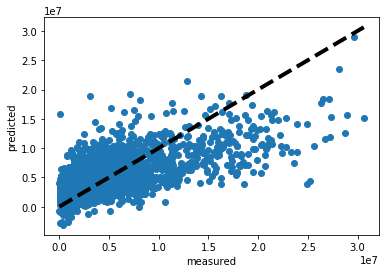

In [59]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [60]:
cleaned.keys()

Index(['#', 'Season Start', 'Player Name', 'Player Salary in $',
       'Salary in 2019 Dollars', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS'],
      dtype='object')

In [67]:
modelAll = smf.ols('Salary in 2019 Dollars~ MP',cleaned)

SyntaxError: invalid syntax (<unknown>, line 1)

([<matplotlib.axis.YTick at 0x1cd3aba46a0>,
 <a list of 35 Text yticklabel objects>)

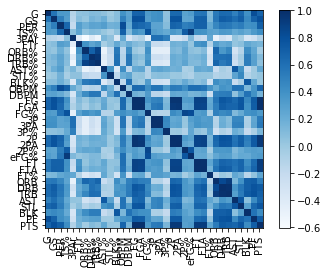

In [42]:
plt.imshow(X.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(X.columns))]
plt.xticks(tick_marks, X.columns, rotation='vertical')
plt.yticks(tick_marks, X.columns)

In [65]:
model.coef_[1]

26902.878931239746